In [2]:
#librerias
from urllib.request import urlopen
from PIL import Image
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
from mplsoccer import PyPizza, add_image, FontManager

In [131]:
#fuentes y fotos
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
robotto_regular = FontManager('https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true')

URL_2 = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular_2 = FontManager(URL_2)

URL2 = "matiperez-modified.png"
fdj_cropped2 = Image.open(URL2)
#Uso esta web para hacer las imagenes circulares: https://crop-circle.imageonline.co/

In [4]:
#dataframes
df_jug = pd.read_excel('Copa de la Liga 2022.xlsx')
df_eq = pd.read_excel('Copa de la Liga 2022.xlsx', sheet_name='Equipos')
df_jug = df_jug[:754]

In [127]:
df_jug.columns

Index(['#', 'Team', 'Name', 'Posicion', 'Lado', 'Rating', 'Appearances',
       'Started', 'Minutes played', 'Yellow cards',
       ...
       'Headed goals', 'Headed goals per 90', 'Left foot goals',
       'Right foot goals', 'Hit woodwork', 'Hit woodwork per 90', 'Offsides',
       'Offsides per 90', 'Penalty conversion', 'Set piece conversion %'],
      dtype='object', length=127)

In [128]:
#Defino los valores, parametros y los filtros en los dfs para mis radares.

#para jugadores que son medios/laterales
df = df_jug[(df_jug['Posicion'] == 'Central') & (df_jug['Minutes played'] > 500)]
df_pizza = df[['Name', 'Total duels won per 90', 'Fouls per 90', 'Aerial duels won per 90','Accurate opposition half passes per 90', 'Acc. Passes per 90', 'Accurate passes %', 'Tackles per 90', 'Interceptions per 90', 'Clearances per 90', 'Total shots per 90']]

#para jugadores que son delanteros
#df = df_jug[(df_jug['Posicion'] == 'Delantero') & (df_jug['Minutes played'] > 500)]
#df_pizza = df[['Name', 'Ground duels won per 90', 'Aerial duels won per 90', 'Was fouled per 90','Succ. Dribbles per 90','Key passes per 90', 'Accurate final third passes per 90', 'Goals per 90','Goal conversion %', 'Total shots per 90']]

#con eso defino los params y las dos listas que necesito para plotear
params = list(df_pizza.columns)
player = df_pizza.loc[df_pizza['Name'] == 'Matías Pérez'].reset_index() #aca defino al jugador del radar.
player = list(player.loc[0])
player = player[2:] #--> valor de las estadisticas de ese jugador
params = params[1:]

values = [] #--> lista que se va a llenar con el percentil del jugador en base a su estadistica y la de los otros jugadores en ese df que se filtro antes.
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

player, values

([6.258278145695364,
  1.1920529801324504,
  2.2847682119205297,
  12.218543046357615,
  48.675496688741724,
  85.51,
  3.1788079470198674,
  2.781456953642384,
  4.072847682119205,
  0.4966887417218543],
 [90, 70, 40, 74, 90, 97, 100, 97, 47, 34])

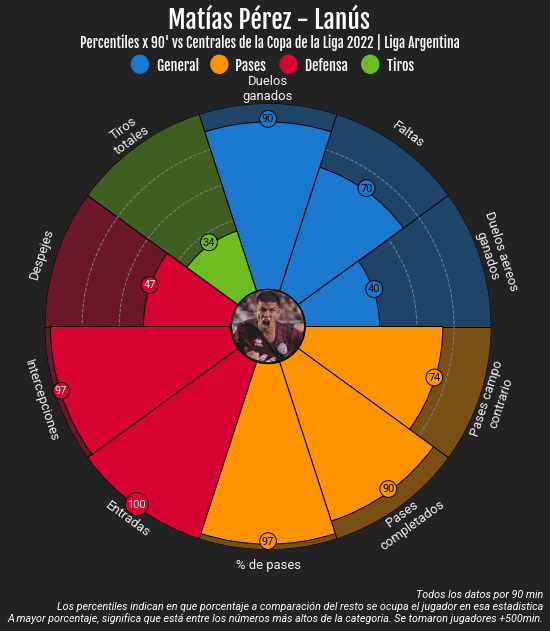

In [132]:
# El color de cada porción y, del texto del número, del radar para así poder distinguir categorias
slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 3 + ["#D70232"] * 3 + ["#6cbd20"] * 1
text_colors = ["#000000"] * 6 + ["#F2F2F2"] * 3 +  ["#000000"] * 1

#Defino los parametros a plotear, en comentados están los otros que use, aca solo importa el nombre (y obvio el orden de los values que esta dado por el params anterior)

params = ['Duelos\nganados', 'Faltas', 'Duelos aereos\nganados','Pases campo\ncontrario', 'Pases \ncompletados', '% de pases', 'Entradas', 'Intercepciones', 'Despejes', 'Tiros\ntotales']
#params = ['Duelos\nganados', 'Duelos en el suelo\nganados',  'Perdidas de\nposesión', 'Pases al últ. tercio\ncompletados', 'Pases \ncompletados', '% de pases', 'Pases clave','Faltas', 'Entradas', 'Intercepciones', 'Despejes','Tiros\ntotales']
#params = ['Duelos en el suelo', 'Duelos aereos', 'Fue fouleado','Amagues comp.','Chances creadas', 'Pases últ. tercio', 'Goles','% conversión de gol', 'Tiros totales']

# inicio la instancia de PyPizza, sacada de --> docu: https://mplsoccer.readthedocs.io/en/latest/gallery/index.html#pizza-plots 
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# Ploteo
fig, ax = baker.make_pizza(
    values,                          # los valores de los percentiles
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                              # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=13,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="circle,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# Titulo
fig.text(
    0.515, 0.989, "Matías Pérez - Lanús", size=25,
    ha="center", fontproperties=robotto_regular.prop, color="white"
)

# Subtitulo
fig.text(
    0.515, 0.959,
    "Percentiles x 90' vs Centrales de la Copa de la Liga 2022 | Liga Argentina",
    size=13.5,
    ha="center", fontproperties=robotto_regular.prop, color="white"
)

# Notas al pie.
CREDIT_1 = "Los percentiles indican en que porcentaje a comparación del resto se ocupa el jugador en esa estadistica"
CREDIT_2 = "A mayor porcentaje, significa que está entre los números más altos de la categoria. Se tomaron jugadores +500min."
CREDIT_3 = 'Todos los datos por 90 min'

fig.text(
    0.99, 0.02, f"{CREDIT_3}\n{CREDIT_1}\n{CREDIT_2}", size=10.7,
    fontproperties=font_italic.prop, color="white",
    ha="right"
)

# Texto
fig.text(
    0.32, 0.921, "General            Pases             Defensa             Tiros", size=14,
    fontproperties=robotto_regular.prop, color="white"
)

# Circulos de color.
fig.patches.extend([
    plt.Circle(
        (0.29, 0.931), 0.015, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.428, 0.931), 0.015, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.548, 0.931), 0.015, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.69, 0.931), 0.015, fill=True, color="#6cbd20",
        transform=fig.transFigure, figure=fig
    ),
])


# Imagen del centro.
ax_image = add_image(
    fdj_cropped2, fig, left=0.45, bottom=0.434, width=0.125, height=0.14
)   # these values might differ when you are plotting

#guardar
plt.savefig("radarPercentiles.png", dpi = 300, bbox_inches= 'tight')

In [83]:
df_eq.columns

Index(['Equipo', 'Partidos', 'Goles', 'Goles concedidos', 'Asistencias',
       'Unnamed: 5', 'Goles por partido', '% conversion de gol', 'Penales',
       'Tiros libres', 'Goles adentro del area', 'Goles afuera del area',
       'Goles con izq', 'Goles con der', 'Goles de cabeza',
       'Grandes chances por partido', 'Grandes chances erradas por partido',
       'Tiros por partido', 'Tiros al arco por partido',
       'Tiros afuera por partido', 'Tiros bloqueados por partido',
       'Amagues comp. Por partido', 'Corners', 'Palos', 'Contraataque',
       'Unnamed: 25', 'Posesion', 'Pases totales', 'Pases propio campo',
       'Pases campo contrario', 'Pases largos', 'Centros ', 'Unnamed: 32',
       'Valla invicta', 'Goles en contra por partido', 'Entradas',
       'Intercepciones', 'Despejes', 'Atajadas', 'Errores para gol',
       'errores para tiro', 'Penales cometidos', 'Goles de penal en contra',
       'Despeje en la linea', 'Entrada ultimo hombre', 'Unnamed: 45',
       'Duelo

In [82]:
df_eq['accionesDefensivas'] = df_eq['Intercepciones'] + df_eq['Entradas'] + df_eq['Despejes']

In [5]:
#Lista con todas las fotos de los escudos para plotear.

paths = [
'gelp.png',
'tigre.png',
'velez.png',
'casla.png',
'patronato.png',
'aaaj.png',
'edlp.png',
'newells.png',
'central cordoba.png',
'huracan.png',
'river.png',
'arsenal.png',
'talleres.png',
'atletico tucuman.png',
'godoy cruz.png',
'racing.png',
'lanus.png',
'union.png',
'banfield.png',
'platense.png',
'aldosivi.png',
'dyj.png',
'boca.png',
'colon.png',
'independiente.png',
'rosario central.png',
'barracas.png',
'sarmiento.png'
]

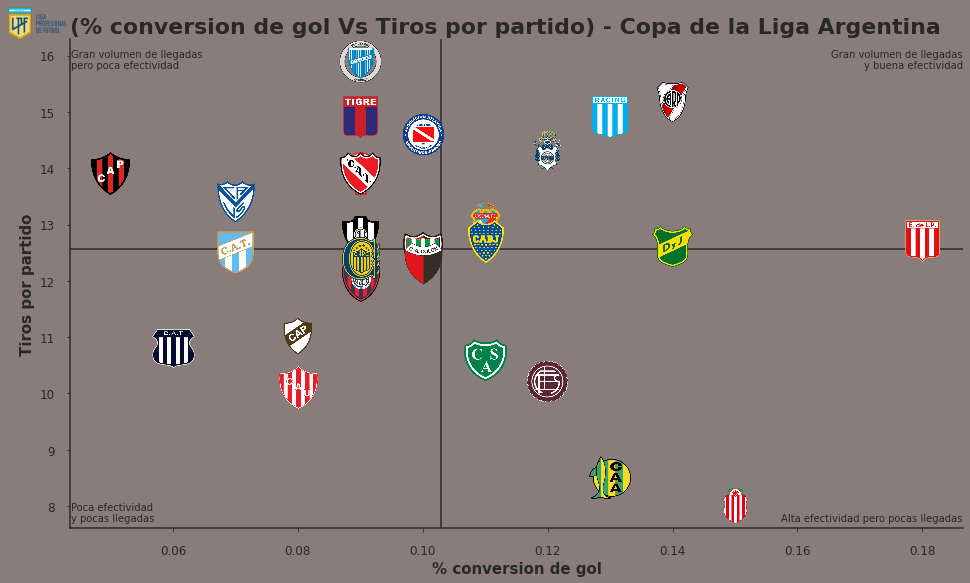

In [89]:
#scatter equipos

def getImage(path, zoom=0.17):
    return OffsetImage(plt.imread(path), zoom=zoom)


#Solo cambio Atr1 y Atr2 para cada scatter.
Atr1 = '% conversion de gol'
Atr2 = 'Tiros por partido'
x=df_eq[Atr1]
y=df_eq[Atr2]

#Calculo los promedios
promx, promy = df_eq[Atr1].mean(), df_eq[Atr2].mean()

#Defino el grafico en su totalidad.
fig, ax = plt.subplots(figsize =(16, 9))
ax.scatter(x, y)
fig.patch.set_facecolor('#897D7B')
ax.set_facecolor('#897D7B')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#292828')
ax.spines['left'].set_color('#292828')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.yaxis.set_tick_params(pad = 12,colors='#292828',labelsize=12)
ax.xaxis.set_tick_params(pad = 12,colors='#292828',labelsize=12)
ax.grid(b=True, color ='#292828',linestyle ='-', linewidth = 0,alpha = 0.5)
ax.grid(which='minor', color ='#292828',linestyle ='-', linewidth = 1.5, alpha=1)

#Titulo y etiquetas de ejes.
ax.set_xlabel(Atr1, fontsize=15,color='#292828',fontweight="bold")
ax.set_ylabel(Atr2, fontsize=15,color='#292828',fontweight="bold")
ax.set_title('('+Atr1+' Vs '+Atr2+')'+' - Copa de la Liga Argentina',
                     loc ='left', color='#292828',fontsize = 22,fontweight="bold")

#Lineas de promedio
ax.axvline(promx, color='#292828')
ax.axhline(promy, color='#292828')

#Notas en los cuadrantes.
ax.text(0.0015, 0.98, 'Gran volumen de llegadas\npero poca efectividad',horizontalalignment='left',color='#292828',verticalalignment='top',transform=ax.transAxes)
ax.text(1, 0.98, 'Gran volumen de llegadas\ny buena efectividad',horizontalalignment='right',color='#292828',verticalalignment='top',transform=ax.transAxes)
ax.text(0.0015, 0.01, 'Poca efectividad\ny pocas llegadas',color='#292828',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)
ax.text(1, 0.01, 'Alta efectividad pero pocas llegadas',color='#292828',horizontalalignment='right',verticalalignment='bottom',transform=ax.transAxes)

#Agrego los escudos --> toda de @mati_9_perez esta
for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    
ax_image = add_image(
    Image.open("lpf.png"), fig, left=0.07, bottom=0.8774, width=0.053, height=0.053
)

fig.set_size_inches(16,9)
#Al exportarlo puse archivo png y transparent=True para que me devuelva un archivo sin fondo y así agregarselo en Photoshop.
plt.savefig('tirosvs%gol.png', dpi=300, bbox_inches='tight', transparent=True)

In [236]:
#Creo un df copiando y pegando desde SofaScore para tener los minutos jugados de cada jugador de Lanús. Despues en Tableau calcule el % sobre el total (1260mins totales)

lanus = pd.DataFrame({'jugadores':[
'José López',
'Fernando Monetti',
'Matías Pérez',
'Facundo Pérez',
'Ignacio Malcorra',
'Brian Aguirre',
'Nicolás Pasquini',
'Tomás Belmonte',
'Yonatan Cabral',
'José Sand',
'Diego Braghieri',
'Lautaro Acosta',
'Alexandro Bernabei',
'Leonel Di Placido',
'Ángel González',
'Maximiliano Gonzales',
'Diego Valeri',
'Kevin Lomónaco',
'Samuel Careaga',
'Lautaro Morales',
'Claudio Spinelli',
'Mateo Sanabria',
'Brian Aguilar',
'Lucas Varaldo',
'Julián Aude',
'Franco Ortellado',
'Franco Orozco',
'Julio Soler'],
'minutos': 	
    [1116,
1080,
906,
882,
878,
874,
873,
783,
718,
618,
574,
571,
544,
526,
473,
400,
395,
338,
256,
180,
	158,
	150,
	135,
	108,
	101,
	90,
	86,
	13]})